In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
ds = xr.tutorial.open_dataset('rasm').load()

In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue D

In [5]:
ds.xc.attrs

OrderedDict([('long_name', 'longitude of grid cell center'),
             ('units', 'degrees_east'),
             ('bounds', 'xv')])

In [6]:
ds.yc.attrs

OrderedDict([('long_name', 'latitude of grid cell center'),
             ('units', 'degrees_north'),
             ('bounds', 'yv')])

In [7]:
ds.time.attrs

OrderedDict([('long_name', 'time'), ('type_preferred', 'int')])

In [8]:
ds.Tair.attrs

OrderedDict([('units', 'C'),
             ('long_name', 'Surface air temperature'),
             ('type_preferred', 'double'),
             ('time_rep', 'instantaneous')])

In [10]:
ds.xc.shape

(205, 275)

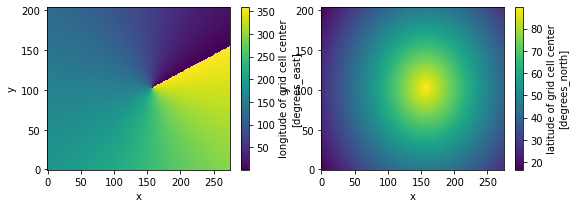

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,3))
ds.xc.plot(ax=ax1);
ds.yc.plot(ax=ax2);

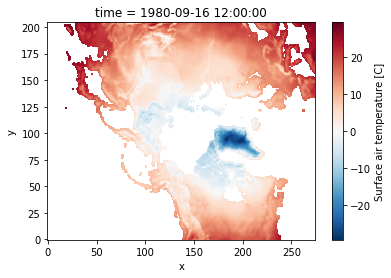

In [14]:
ds.Tair[0].plot()

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


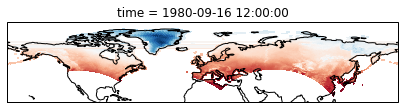

In [16]:
plt.figure(figsize=(7,2));
ax = plt.axes(projection=ccrs.PlateCarree());
ds.Tair[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                           x='xc', y='yc', add_colorbar=False);
ax.coastlines();

In [17]:
# define two-degree wide latitude bins
lat_bins = np.arange(0, 91, 2)

In [18]:
# define a label for each bin corresponding to the central latitude
lat_center = np.arange(1, 90, 2)

In [19]:
# group according to those bins and take the mean
Tair_lat_mean = (ds.Tair.groupby_bins('xc', lat_bins, labels=lat_center)
                 .mean(xr.ALL_DIMS))

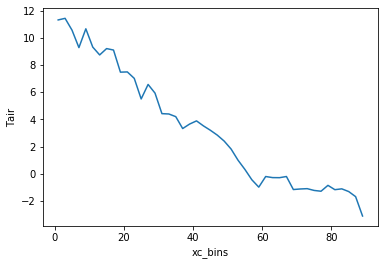

In [20]:
# plot the result
Tair_lat_mean.plot();